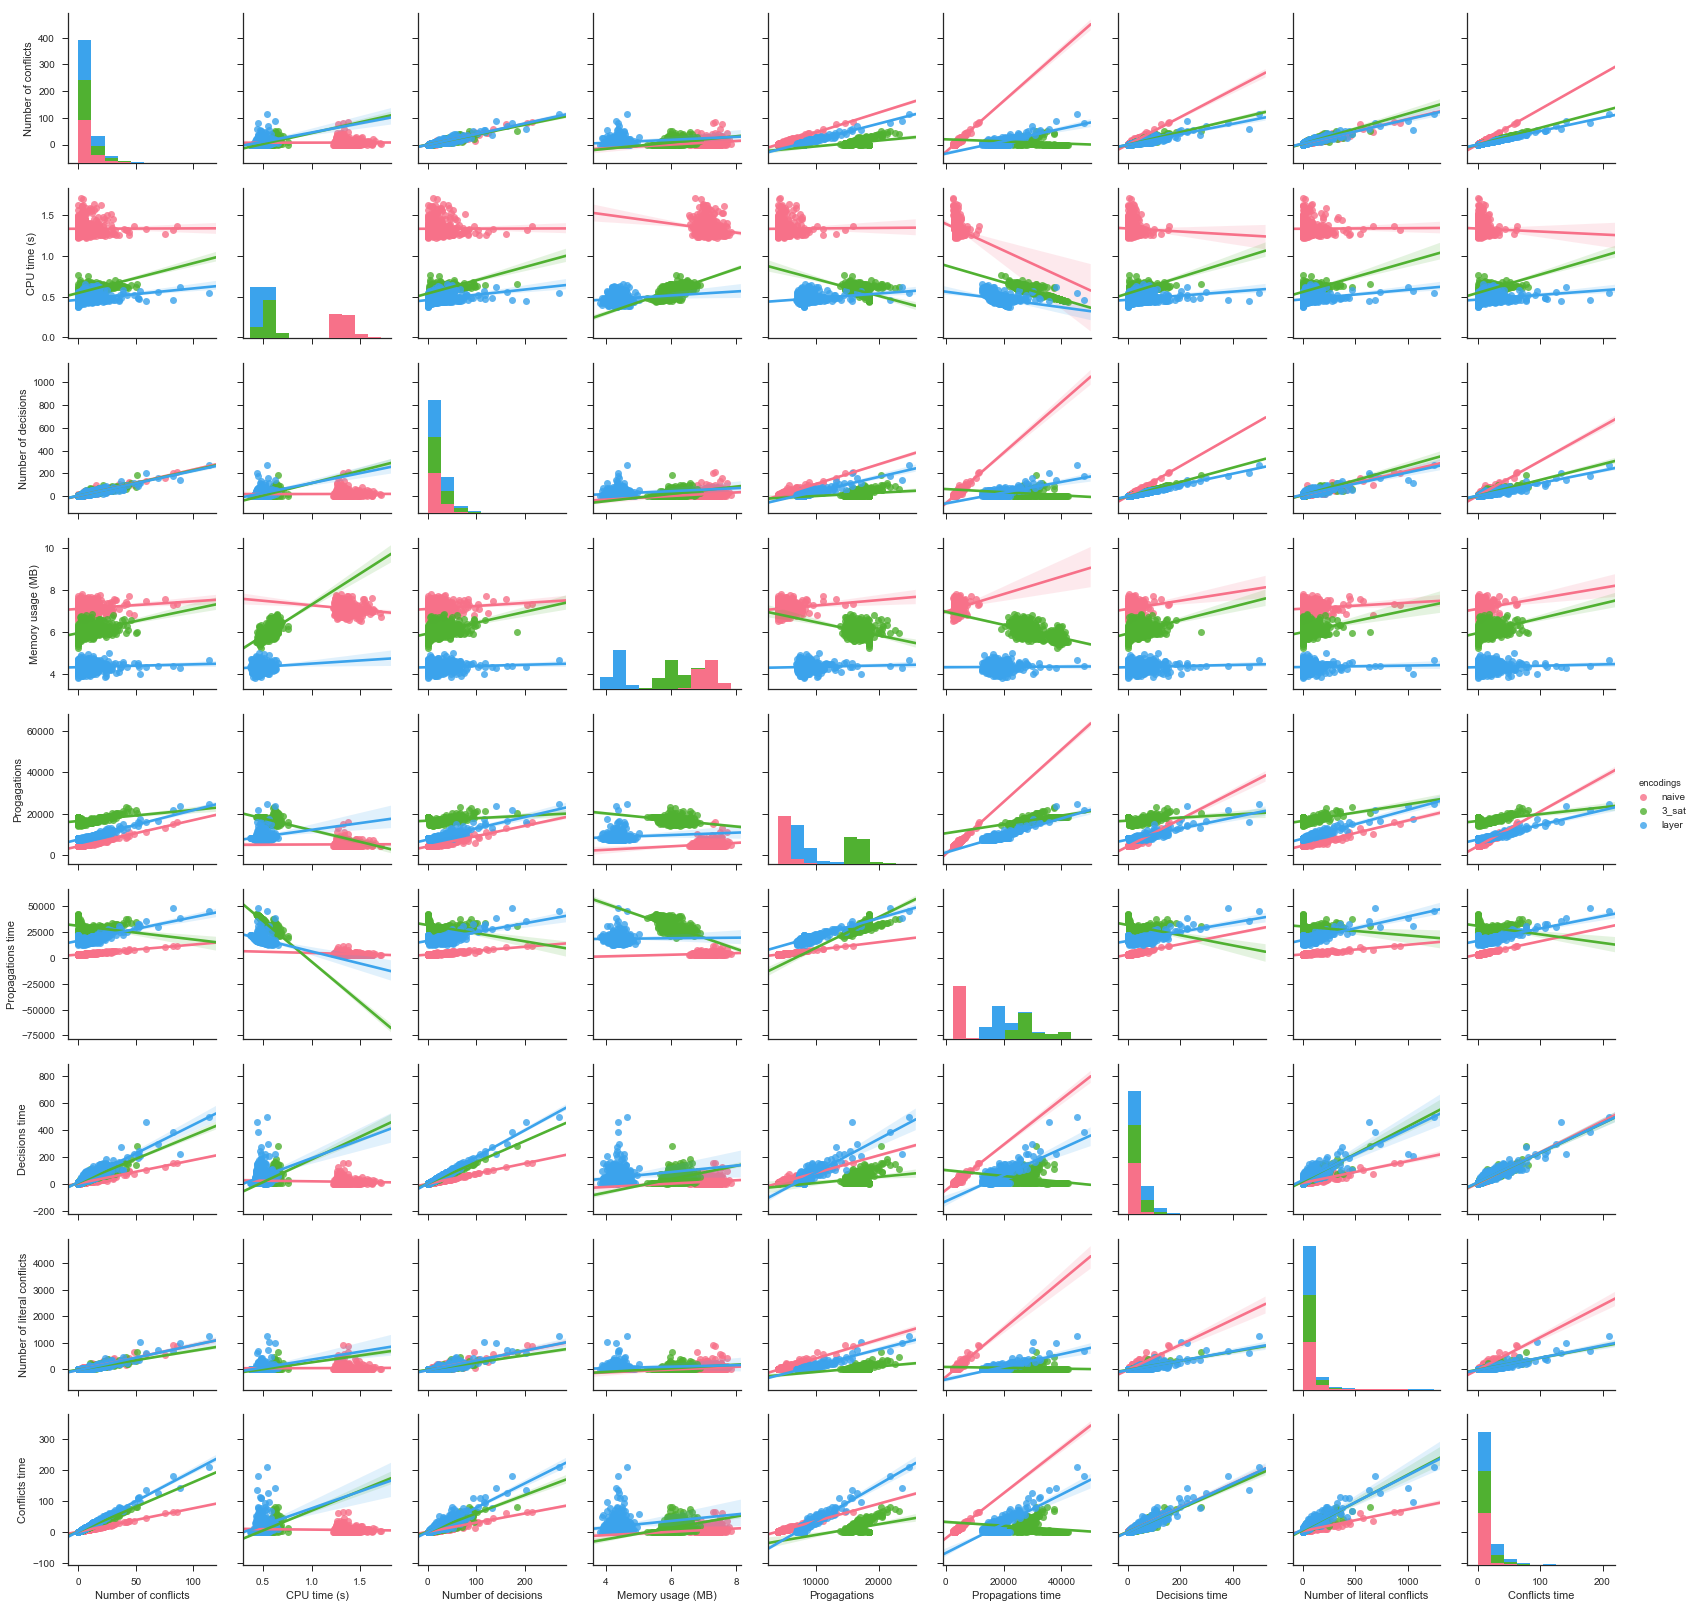

In [68]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set(style="ticks", color_codes=True)


#define general variables
START, END = 4000, 4500
PUZZLE_SIZE = 4
puzzle_size = PUZZLE_SIZE**2
STAT_DIR_N = "./stat/"+str(PUZZLE_SIZE)+"/"+str(PUZZLE_SIZE)+"/"
STAT_DIR_3SAT = "./stat/"+str(PUZZLE_SIZE)+"/"+str(PUZZLE_SIZE)+"_3SAT/"
STAT_DIR_L = "./stat/"+str(PUZZLE_SIZE)+"/"+str(PUZZLE_SIZE)+"_L/"

# observed statistics
file_names = ["final_conflicts", "final_cpu_time", "final_decisions", "final_memory", "final_propagation","final_propagation_cpu", 
              "final_decisions_cpu", "final_conflicts_literals", "final_conflicts_cpu"]

plot_names = ["Number of conflicts", "CPU time (s)", "Number of decisions", "Memory usage (MB)",
             "Progagations", "Propagations time", 
              "Decisions time", "Number of literal conflicts", "Conflicts time"]

arr = np.zeros((1503,len(plot_names)+1))


# import stat from txt
for i in range(len(file_names)):
    # naive
    with open(os.path.join(STAT_DIR_N, "{}.txt".format(file_names[i]))) as reader:
        string_array_n = reader.read()
        actual_array_n = np.fromstring(string_array_n, dtype = float, sep=",")
        arr[0:501, i] = actual_array_n[:]
    # 3sat
    with open(os.path.join(STAT_DIR_3SAT, "{}.txt".format(file_names[i]))) as reader:
        string_array_3sat = reader.read()
        actual_array_3sat = np.fromstring(string_array_3sat, dtype = float, sep=",")
        arr[501:1002, i] = actual_array_3sat[:]
    # layered
    with open(os.path.join(STAT_DIR_L, "{}.txt".format(file_names[i]))) as reader:
        string_array_l = reader.read()
        actual_array_l = np.fromstring(string_array_l, dtype=float, sep=",")
        arr[1002:, i] = actual_array_l[:]


# create a numpy array and then a pandas DataFrame

# arr[0:501, len(plot_names)] = "naive"
# arr[501:1002, len(plot_names)] = "3_sat"
# arr[1002:, len(plot_names)] = "layer"
plot_names.append("encodings")

df = pd.DataFrame(data = arr, index = range(1503), columns = plot_names)
df.loc[0:501, 'encodings'] = "naive"
df.loc[501:1002, 'encodings'] = "3_sat"
df.loc[1002:, 'encodings'] = "layer"
# print(df)
g = sns.pairplot(df, hue = "encodings", palette="husl",  kind="reg")
plt.show()  

